# Credit Risk Resampling Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [135]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

#Oversampling
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE

#Undersampling
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN 

# Read the CSV into DataFrame

In [61]:
# Load the data
df = pd.read_csv('lending_data.csv')
df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


In [62]:
# Understand the shape of the dataframe to make correct splitting decisions
# The Y variable is the loan_status
print(df.shape)
print(Counter(df.loan_status))

(77536, 9)
Counter({'low_risk': 75036, 'high_risk': 2500})


In [63]:
#The Df cannot have variables that are not numbers such as 'Own' or 'mortgage'
df['homeowner'].value_counts()

mortgage    38572
own         30930
rent         8034
Name: homeowner, dtype: int64

# Split the Data into Training and Testing

In [64]:
# Create our features
X = df.drop(columns='loan_status')
#Use get_dummies to one-hot-encode the homeowner column
X = pd.get_dummies(X, columns=['homeowner'])

# Create our target
Y = df['loan_status']

# Use the label encoder to create a binary class
#This transformer should be used to encode target values, *i.e.* `y`, and not the input `X`.

encoder = LabelEncoder()
encoder.fit(Y)
Y_code = encoder.transform(Y)
Y = Y_code

In [65]:
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,homeowner_mortgage,homeowner_own,homeowner_rent
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.497472,0.398911,0.103616
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.499997,0.489678,0.304764
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000,0.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000,0.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,1.000000,1.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000,1.000000,1.000000


In [66]:
# Check the balance of our target values
# 1 is low risk and 0 is high risk
Counter(Y)

Counter({1: 75036, 0: 2500})

In [67]:
# Create X_train, X_test, y_train, y_test
#Following the 80-20 rule, we want 80% of our data for training the algorithm.
print(77536*0.8)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

62028.8


## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [140]:
# Create the StandardScaler instance

scaler = StandardScaler()

In [69]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
scaler.fit(X_train)

StandardScaler()

In [70]:
# Scale the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Simple Logistic Regression

In [77]:
#Create the model and fit the model.
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [116]:
# Calculated the balanced accuracy score
#The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. 
#It is defined as the average of recall obtained on each class.
#The best value is 1 and the worst value is 0


y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.988357778120512

In [134]:
# Display the confusion matrix

confusion_matrix(y_test , y_pred)

array([[  498,     9],
       [   83, 14918]], dtype=int64)

In [118]:
# Print the imbalanced classification report

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.98      0.99      0.92      0.99      0.98       507
          1       1.00      0.99      0.98      1.00      0.99      0.98     15001

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     15508



In [59]:
#From the classification report, we see a high F1 score of 0.99. This indicates that the model is working extraordinarily well.

# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [75]:
# Resample the training data with the RandomOversampler
#Create the random sampler instance
ros = RandomOverSampler(random_state=1)

#Create the resampled data for x and y train
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# View the count of target classes with Counter
Counter(y_resampled)

Counter({1: 60035, 0: 60035})

In [80]:
#We now have a balanced dataset of low and high risk loans.

In [81]:
# Train the Logistic Regression model using the resampled data
ros_model = LogisticRegression(solver='lbfgs', random_state=1)
ros_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [82]:
# Calculated the balanced accuracy score
ros_y_pred = ros_model.predict(X_test)
balanced_accuracy_score(y_test, ros_y_pred)

0.988357778120512

In [83]:
# Display the confusion matrix
confusion_matrix(y_test, ros_y_pred)

array([[  498,     9],
       [   83, 14918]], dtype=int64)

In [84]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, ros_y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.98      0.99      0.92      0.99      0.98       507
          1       1.00      0.99      0.98      1.00      0.99      0.98     15001

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     15508



### SMOTE Oversampling

In [89]:
# Resample the training data with SMOTE
sm_X_resampled, sm_y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train, y_train)

# View the count of target classes with Counter
Counter(sm_y_resampled)

Counter({1: 60035, 0: 60035})

In [90]:
# Train the Logistic Regression model using the resampled data
sm_model = LogisticRegression(solver='lbfgs', random_state=1)
sm_model.fit(sm_X_resampled, sm_y_resampled)

LogisticRegression(random_state=1)

In [91]:
# Calculated the balanced accuracy score
sm_y_pred = ros_model.predict(X_test)
balanced_accuracy_score(y_test, sm_y_pred)

0.988357778120512

In [93]:
# Display the confusion matrix
confusion_matrix(y_test, sm_y_pred)

array([[  498,     9],
       [   83, 14918]], dtype=int64)

In [94]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, sm_y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.98      0.99      0.92      0.99      0.98       507
          1       1.00      0.99      0.98      1.00      0.99      0.98     15001

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     15508



# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

Definition: Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.

In [100]:
# Resample the data using the ClusterCentroids resampler
cc = ClusterCentroids(random_state=1)
cc_X_res, cc_y_res = cc.fit_resample(X_test, y_test)

# View the count of target classes with Counter
Counter(cc_y_res)

Counter({0: 507, 1: 507})

In [101]:
# Train the Logistic Regression model using the resampled data
cc_model = LogisticRegression(solver='lbfgs', random_state=1)
cc_model.fit(cc_X_res, cc_y_res)

LogisticRegression(random_state=1)

In [102]:
# Calculate the balanced accuracy score
cc_y_pred = cc_model.predict(X_test)
balanced_accuracy_score(y_test, cc_y_pred)

0.9893439714143974

In [137]:
# Display the confusion matrix
confusion_matrix(y_test, cc_y_pred)

array([[  499,     8],
       [   83, 14918]], dtype=int64)

In [104]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, cc_y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.98      0.99      0.92      0.99      0.98       507
          1       1.00      0.99      0.98      1.00      0.99      0.98     15001

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     15508



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

Definition: Combine over- and under-sampling using SMOTE and Edited Nearest Neighbour

In [138]:
# Resample the training data with SMOTEENN
sme = SMOTEENN(random_state=1)
sme_X_res, sme_y_res = sme.fit_resample(X_train, y_train)

# View the count of target classes with Counter
Counter(sme_y_res)

Counter({0: 59140, 1: 59682})

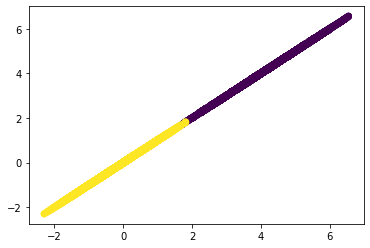

In [139]:
plt.scatter(sme_X_res[:, 0], sme_X_res[:, 1], c=sme_y_res)

In [111]:
# Train the Logistic Regression model using the resampled data
sme_model = LogisticRegression(solver='lbfgs', random_state=1)
sme_model.fit(sme_X_res, sme_y_res)

LogisticRegression(random_state=1)

In [113]:
# Calculate the balanced accuracy score
sme_y_pred = sme_model.predict(X_test)
balanced_accuracy_score(y_test, sme_y_pred)

0.9939749578824922

In [114]:
# Display the confusion matrix
confusion_matrix(y_test, sme_y_pred)

array([[  504,     3],
       [   92, 14909]], dtype=int64)

In [115]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, sme_y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.99      0.99      0.91      0.99      0.99       507
          1       1.00      0.99      0.99      1.00      0.99      0.99     15001

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     15508



# Final Questions

1. Which model had the best balanced accuracy score?

   SMOTEENN had the best balanced accuracy score of 99.4

2. Which model had the best recall score?

    All models had a recall score of 99

3. Which model had the best geometric mean score?

    All models had a geometric mean on 99.